# Explore here

In [60]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#------------ PREPROCESING --------------
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
# ----------- MACHINE LEARNING ----------
from sklearn.svm import SVC
# ----------- METRICS -------------------
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
#------------ OPTIMIZATION --------------
from sklearn.model_selection import GridSearchCV

In [26]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv")

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   url      2999 non-null   object
 1   is_spam  2999 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 26.5+ KB


In [27]:
df_raw.sample(10)

,url,is_spam
2747,https://www.theskimm.com/picks/everything-youl...,False
521,https://techcrunch.com/2020/06/16/canva-design...,False
2581,http://snarkmarket.com/2010/4890,False
1659,https://www.readingdesign.org/ten-things,False
2735,https://www.washingtonpost.com/health/2020/04/...,False
1247,https://www.theatlantic.com/science/archive/20...,False
2215,https://www.morningbrew.com/daily/stories/2020...,False
850,https://www.nytimes.com/2020/06/23/us/politics...,False
1965,https://www.masslive.com/sports/2020/06/colleg...,False
1605,https://www.morningbrew.com/daily/stories/2020...,False


In [28]:
df_raw.isna().sum()

url        0
is_spam    0
dtype: int64

In [29]:
df_processed = df_raw.copy()

In [30]:
df_processed['is_spam'].value_counts()

is_spam
False    2303
True      696
Name: count, dtype: int64

In [31]:
#Convert Catogorical to Numerical
df_processed['is_spam'] = df_processed['is_spam'].apply(lambda x: 1 if x == True else 0)

df_processed.sample(10)

,url,is_spam
2269,https://www.npr.org/2020/06/29/884611485/congr...,0
2171,https://digg.com/video/why-you-cant-drive-betw...,0
2467,https://docs.google.com/document/d/1y_Kv2r9K3Y...,1
2601,https://www.morningbrew.com/,1
1666,https://digg.com/video/crime-expert-critiques-...,0
750,https://p.liadm.com/click,1
1251,https://www.mentalfloss.com/article/624770/liv...,0
1022,https://www.vice.com/en_us/article/5dz94x/uber...,0
1964,https://www.clarionledger.com/story/news/polit...,0
74,https://www.youtube.com/watch?v=EIEwy8rPik4&re...,0


In [33]:
#Drop Duplicates
df_processed = df_processed.drop_duplicates()
df_processed = df_processed.reset_index(inplace = False, drop = True)
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   url      2369 non-null   object
 1   is_spam  2369 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 37.1+ KB


In [34]:
import regex as re
def preprocess_text(text):
    text = text.lower() #To lower case
    text = re.sub(r'[^a-z ]',' ',text) #Remove Any character that is not a letter
    text = text.strip() #Remove White Spaces at the begin or the end of the text
    text = re.sub(r'\s+',' ',text) #Change multiple white spaces to a single white space
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text) # Remove tags
    return text.split()

In [35]:
#apply preprocesing to url column 
df_processed["url"] = df_processed["url"].apply(lambda x: preprocess_text(x))
df_processed["url"].sample(10)

2300    [https, www, vanityfair, com, hollywood, ziwe,...
957     [https, tim, blog, largest, psychedelic, resea...
1083    [https, www, politico, com, news, senate, pass...
442     [https, arstechnica, com, gadgets, this, is, a...
976         [https, dreamwiki, sixey, es, welcome, dream]
1292    [https, www, theverge, com, microsoft, retail,...
1836                [https, apnews, com, c, aab, b, a, f]
904           [https, revtownusa, com, offer, the, skimm]
2020                             [https, quotebacks, net]
1150    [https, puzzles, blainesville, com, npr, sunda...
Name: url, dtype: object

In [38]:
#Lemmatize Text and removing Stopwords

download("wordnet")
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/arnaldochm/nltk_data...


In [39]:
download("stopwords")
stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/arnaldochm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
def lemmatize_text(words, lemmatizer = lemmatizer):
    tokens = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if len(word) > 3]
    return tokens

In [41]:
df_processed["url"] = df_processed["url"].apply(lambda x: lemmatize_text(x))
df_processed["url"].sample(10)

21      [http, scmp, abacus, tech, article, satellite,...
1328    [http, youtube, watch, ssjb, source, morning, ...
880           [http, utopiskehorisonter, engelsk, comcur]
1785                        [http, zwift, welcome, zwift]
397     [http, tech, wirecard, missing, money, index, ...
1044    [http, police, reform, bill, house, democrat, ...
1261    [http, theguardian, commentisfree, abolish, po...
1837    [http, nytimes, technology, twitter, trump, do...
1383    [http, youtube, watch, eadanpfqdca, feature, y...
2162    [http, washingtonpost, politics, democrat, pub...
Name: url, dtype: object

In [ ]:
#Basic EDA

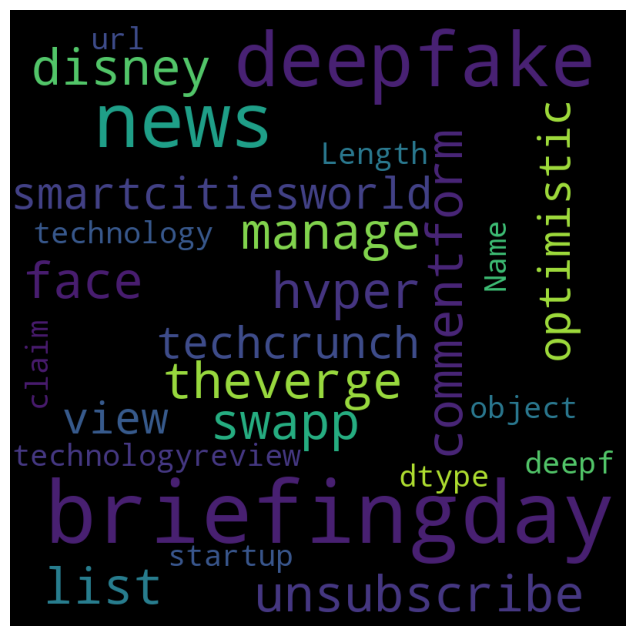

In [43]:
#reate a WordCloud for Entire df_train
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, background_color = "black", max_words = 1000, min_font_size = 20, random_state = 42)\
    .generate(str(df_processed["url"]))

fig = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
#On the previous Wordcloud it is visible that we have many occurences of possible spam and real urls.
#Words like deepfake or claim can be used, for example claim can be used to tell people to claim a gift.

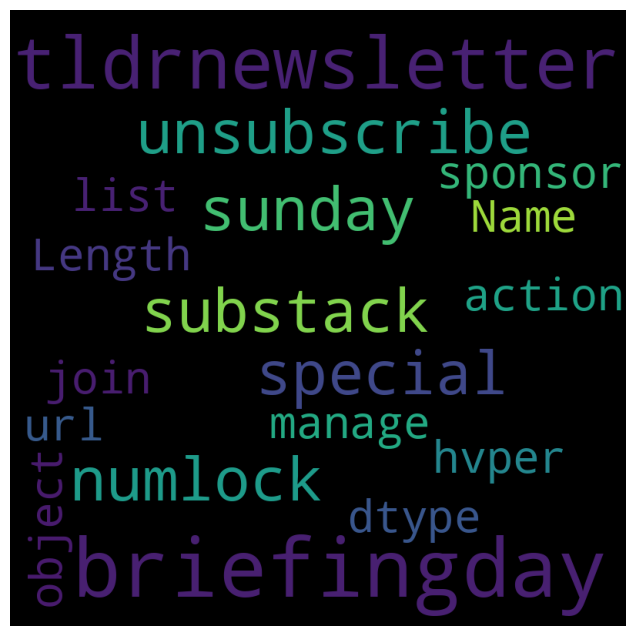

In [47]:
#reate a WordCloud for df_train with spam urls
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, background_color = "black", max_words = 1000, min_font_size = 20, random_state = 42)\
    .generate(str(df_processed[df_processed['is_spam']==1]['url']))

fig = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

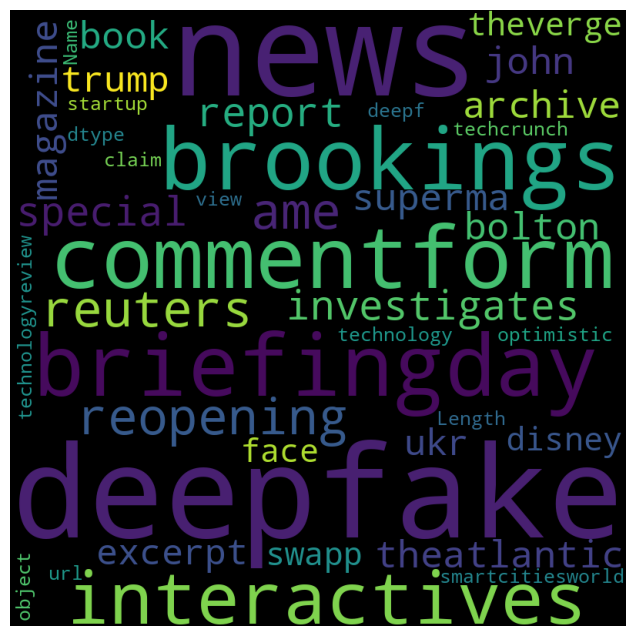

In [48]:
#reate a WordCloud for df_train with not spam urls
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, background_color = "black", max_words = 1000, min_font_size = 20, random_state = 42)\
    .generate(str(df_processed[df_processed['is_spam']==0]['url']))

fig = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<Axes: >

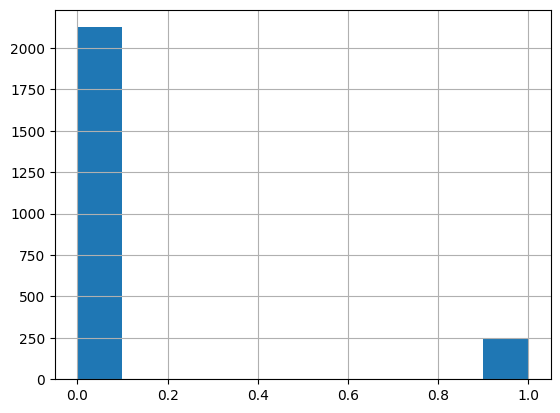

In [52]:
df_processed['is_spam'].hist()

In [55]:
df_urls =  sorted(df_processed['url'].values, key=len, reverse=True)

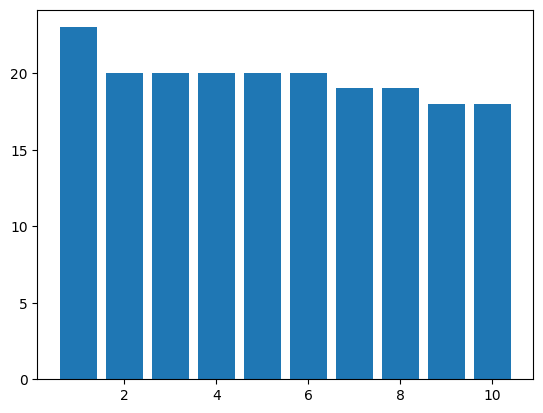

In [57]:
element_counts = [len(sublist) for sublist in df_urls[:10]]
plt.bar(range(1, 11), element_counts) 
plt.show()

In [58]:
#Top 10 most longest urls contains more than 15 words (after removing stopwords)

In [49]:
#Tokenize and Create train test split

tokens_list = df_processed['url']
tokens_list = [" ".join(tokens) for tokens in tokens_list]

vectorizer = TfidfVectorizer(max_features = 5000, max_df = 0.8, min_df = 5)
X = vectorizer.fit_transform(tokens_list).toarray()
y = df_processed['is_spam']

X[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [63]:
#Model Prediction

In [62]:
model = SVC(kernel = "linear", random_state = 1625)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=1625)

In [65]:
y_hat = model.predict(X_test)
y_hat

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [66]:
print(f'Accuracy for SVC: {accuracy_score(y_test,y_hat)}')

Accuracy for SVC: 0.9514767932489452


In [ ]:
#A very good accuracy is obtained.

In [67]:
#Optimize the Model
SVC().get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [80]:
param_grid = {
    # SVC().get_params().keys()
    'C': [0.01, 0.1, 1.0, 10],
    'kernel': ['linear', 'sigmoid'],    
    'random_state': [1630]
}

In [81]:
grid = GridSearchCV(model, param_grid, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=SVC(kernel='linear', random_state=1625),
             param_grid={'C': [0.01, 0.1, 1.0, 10],
                         'kernel': ['linear', 'sigmoid'],
                         'random_state': [1630]},
             scoring='accuracy')

In [82]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(kernel='linear', random_state=1625),
             param_grid={'C': [0.01, 0.1, 1.0, 10],
                         'kernel': ['linear', 'sigmoid'],
                         'random_state': [1630]},
             scoring='accuracy')

In [83]:
print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 1.0, 'kernel': 'sigmoid', 'random_state': 1630}


In [84]:
model_svc_grid = SVC(C= 1.0, kernel = "sigmoid", degree= 1,random_state = 1630)
model_svc_grid.fit(X_train, y_train)

SVC(degree=1, kernel='sigmoid', random_state=1630)

In [85]:
y_hat_model_grid = model_svc_grid.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test,y_hat_model_grid)}')

Accuracy: 0.9472573839662447


In [87]:
#Save the Model
import pickle
file_name = '../models/svc_clasifier.pkl'
pickle.dump(model_svc_grid, open(file_name, 'wb'))